In [6]:
import os

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
# import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

data_dir = "data"

df = pd.read_parquet(os.path.join(data_dir, "train.parquet"))
features = np.array(df["features"].to_list())

In [7]:
features.shape
target = df["label"].to_numpy().astype(int)

In [8]:
pca = PCA(n_components=512)
reduced_features = pca.fit_transform(features)
print(reduced_features.shape)

(4256, 512)


In [9]:
mapping = {1: 1, 2: 2, 5: 3, 10: 4, 20: 5, 50: 6, 100: 7, 200: 8, 500: 9}

# vfunc = np.vectorize(lambda x: mapping[x])
# mapped_target = vfunc(target)
# mapped_target

/home/dzbanek/miniconda3/envs/umap/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/dzbanek/miniconda3/envs/umap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


1
2
5
10
20
50
100
200
500


/tmp/ipykernel_35226/293702817.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


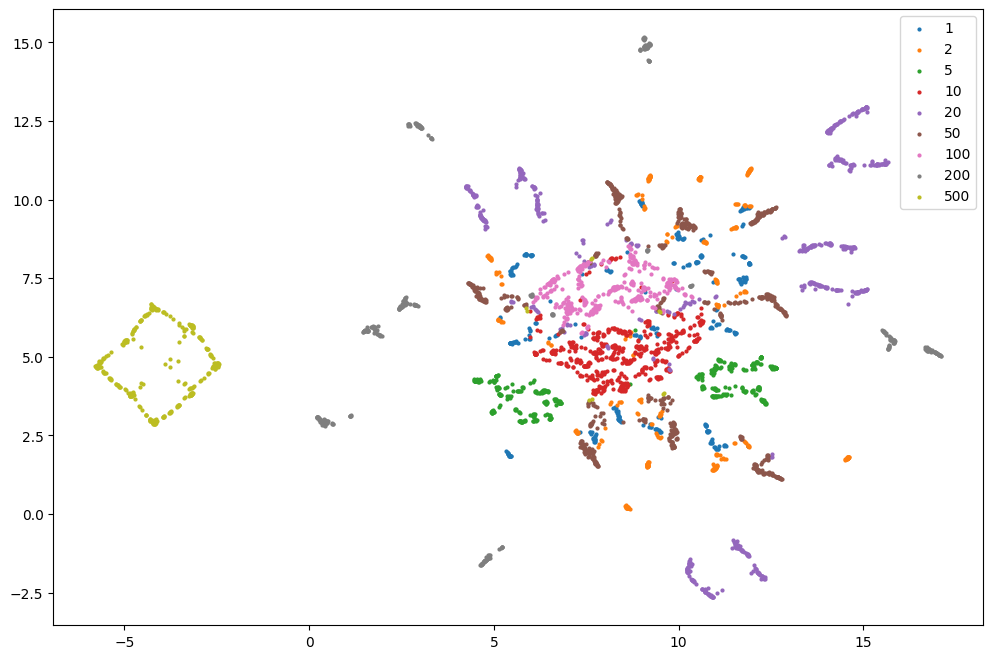

In [10]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(reduced_features)

standard_embedding_labeled = np.concatenate(
    (standard_embedding, target[:, None]), axis=1
)

plt.figure(figsize=(12, 8))
for label in np.unique(target):
    mask = standard_embedding_labeled[:, 2] == label
    masked_embedding = standard_embedding_labeled[mask, :]
    print(label)
    plt.scatter(
        masked_embedding[:, 0],
        masked_embedding[:, 1],
        s=4,
        cmap="Spectral",
        label=f"{label}",
    )

plt.legend()